In [ ]:
!pip install transformers datasets evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 16.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" an

In [ ]:
from datasets import load_dataset
imdb = load_dataset("imdb")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/7.81k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [ ]:
imdb["test"][0]

{'text': 'I love sci-fi and am willing to put up with a lot. Sci-fi movies/TV are usually underfunded, under-appreciated and misunderstood. I tried to like this, I really did, but it is to good TV sci-fi as Babylon 5 is to Star Trek (the original). Silly prosthetics, cheap cardboard sets, stilted dialogues, CG that doesn\'t match the background, and painfully one-dimensional characters cannot be overcome with a \'sci-fi\' setting. (I\'m sure there are those of you out there who think Babylon 5 is good sci-fi TV. It\'s not. It\'s clichéd and uninspiring.) While US viewers might like emotion and character development, sci-fi is a genre that does not take itself seriously (cf. Star Trek). It may treat important issues, yet not as a serious philosophy. It\'s really difficult to care about the characters here as they are not simply foolish, just missing a spark of life. Their actions and reactions are wooden and predictable, often painful to watch. The makers of Earth KNOW it\'s rubbish as 

In [ ]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
def preprocess_function (examples):
  return tokenizer (examples["text"], truncation=True)



In [ ]:

tokenized_imdb = imdb.map(preprocess_function, batched=True)

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [ ]:
tokenized_imdb["train"]

Dataset({
    features: ['text', 'label', 'input_ids', 'attention_mask'],
    num_rows: 25000
})

In [ ]:
tokenized_imdb[ "test"]


Dataset({
    features: ['text', 'label', 'input_ids', 'attention_mask'],
    num_rows: 25000
})

In [ ]:
from datasets import Dataset

In [ ]:
positive_samples = tokenized_imdb["train"].filter (lambda x: x["label"] == 1)
negative_samples = tokenized_imdb["train"]. filter (lambda x: x["label"] == 0)
negative_samples

Filter:   0%|          | 0/25000 [00:00<?, ? examples/s]

Filter:   0%|          | 0/25000 [00:00<?, ? examples/s]

Dataset({
    features: ['text', 'label', 'input_ids', 'attention_mask'],
    num_rows: 12500
})

In [ ]:
balanced_positives = positive_samples.shuffle(seed=42).select(range(1500))
balanced_negatives = negative_samples.shuffle(seed=42).select(range(1500))
# balanced_positives
balanced_negatives

Dataset({
    features: ['text', 'label', 'input_ids', 'attention_mask'],
    num_rows: 1500
})

In [ ]:
balanced_train_dataset = Dataset.from_dict({
    "text":balanced_positives["text"] + balanced_negatives ["text"],
    "label":balanced_positives["label"] + balanced_negatives ["label"],
    "input_ids":balanced_positives["input_ids"] + balanced_negatives["input_ids"],
    "attention_mask":balanced_positives ["attention_mask"] + balanced_negatives ["attention_mask"],
})

In [ ]:
balanced_train_dataset = balanced_train_dataset.shuffle(seed = 42)
balanced_train_dataset

Dataset({
    features: ['text', 'label', 'input_ids', 'attention_mask'],
    num_rows: 3000
})

In [ ]:
positive_test_samples = tokenized_imdb["test"]. filter (lambda x: x["label"] == 1)
negative_test_samples = tokenized_imdb["test"]. filter (lambda x: x["label"] == 0)

Filter:   0%|          | 0/25000 [00:00<?, ? examples/s]

Filter:   0%|          | 0/25000 [00:00<?, ? examples/s]

In [ ]:
balanced_positives_test = positive_test_samples.shuffle(seed=42).select(range(1000))
balanced_negatives_test = negative_test_samples.shuffle(seed=42).select(range(1000))

In [ ]:
balanced_test_dataset = Dataset.from_dict({
    "text": balanced_positives_test["text"] + balanced_negatives_test["text"],
    "label": balanced_positives_test["label"] + balanced_negatives_test["label"],
    "input_ids": balanced_positives_test["input_ids"] + balanced_negatives_test["input_ids"],
    "attention_mask": balanced_positives_test["attention_mask"] + balanced_negatives_test["attention_mask"],
})





In [ ]:
balanced_test_dataset = balanced_test_dataset.shuffle(seed=42)

In [ ]:
from transformers import DataCollatorWithPadding
data_collator = DataCollatorWithPadding(tokenizer = tokenizer)

In [ ]:
!pip install evaluate

In [ ]:
import evaluate

In [ ]:

accuracy = evaluate.load("accuracy")

In [ ]:
import numpy as np

In [ ]:
def compute_metrics (eval_pred) :
  predictions, labels = eval_pred
  predictions = np.argmax(predictions, axis=1)
  return accuracy.compute(predictions=predictions, references=labels)




In [ ]:
id2label = {0: "NEGATIVE", 1: "POSITIVE"}
label2id = {"NEGATIVE": 0, "POSITIVE": 1}

In [ ]:
from transformers import AutoModelForSequenceClassification, TrainingArguments,Trainer


In [ ]:
model = AutoModelForSequenceClassification.from_pretrained(
    "distilbert-base-uncased", num_labels=2, id2label=id2label, label2id=label2id)


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import os
from transformers import TrainingArguments, Trainer

In [ ]:
os.environ[ "WANDB_DISABLED" ] = "true"

In [ ]:
training_args = TrainingArguments(
    output_dir="my_awesome_model",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=2,
    weight_decay=0.01,
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    push_to_hub=False,
    run_name = "my_training_run",
    report_to = "none"
)





In [ ]:
trainer = Trainer(
    model=model, args=training_args,
    train_dataset=balanced_train_dataset,
    eval_dataset=balanced_test_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)





<ipython-input-35-360a3f628a6b>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.234365,0.916000
2,No log,0.245243,0.915000


TrainOutput(global_step=376, training_loss=0.27989933338571105, metrics={'train_runtime': 341.8067, 'train_samples_per_second': 17.554, 'train_steps_per_second': 1.1, 'total_flos': 788299000780128.0, 'train_loss': 0.27989933338571105, 'epoch': 2.0})

In [ ]:
text = "This was a masterpiece. Not completely faithful to the books, but enthralling from beginning to end. Might be my favorite of the three."


In [ ]:
from transformers import pipeline

In [ ]:
classifier = pipeline("sentiment-analysis", model="/content/my_awesome_model/checkpoint-376")
classifier(text)

Device set to use cuda:0


[{'label': 'POSITIVE', 'score': 0.9770373106002808}]

In [ ]:
text = "The movie was too bad"
classifier(text)

[{'label': 'NEGATIVE', 'score': 0.9478989243507385}]

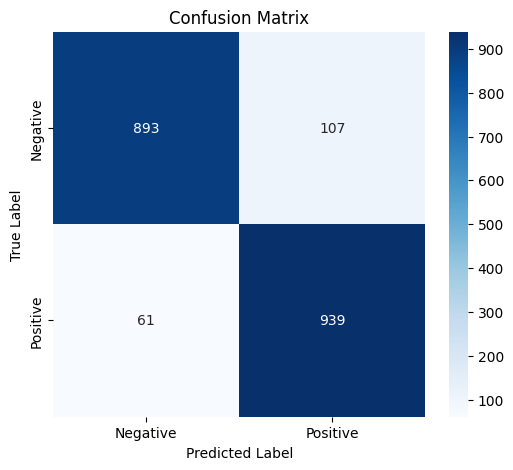

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
# Get model predictions
predictions = trainer.predict(balanced_test_dataset)
# Extract true labels and predicted probabilities
y_true = np. array (predictions. label_ids)
y_prob = predictions.predictions[:, 1] # Assuming second column is the probability for class 1
y_pred = np.argmax(predictions.predictions, axis=1) # Get class predictions
# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
# Plot confusion matrix
plt. figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative","Positive"])
plt.xlabel("Predicted Label")
plt. ylabel ("True Label")
plt.title("Confusion Matrix")
plt. show()

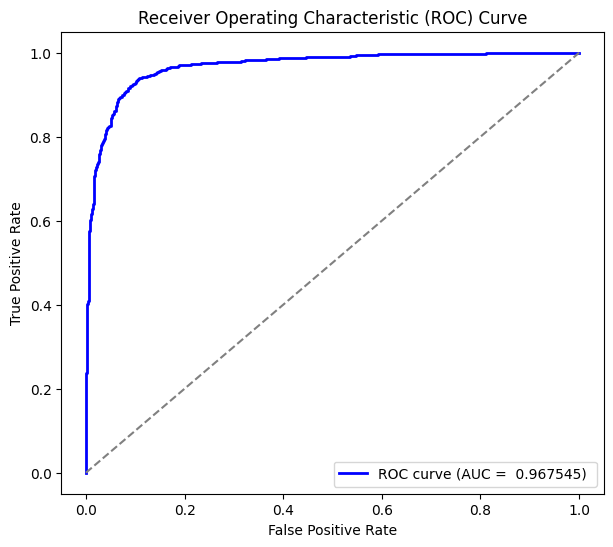

In [ ]:
# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt. figure(figsize=(7, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (AUC = {roc_auc: 3f}) ")
plt. plot([0, 1], [0, 1], color="gray", linestyle="--") # Diagonal line
plt. xlabel("False Positive Rate")
plt. ylabel("True Positive Rate")
plt. title("Receiver Operating Characteristic (ROC) Curve")
plt.legend (loc="lower right")
plt. show()

In [ ]:
# Print classification report


print("Classification Report: \n")
print(classification_report(y_true, y_pred, target_names=["Negative", "Positive"]))

Classification Report: 

              precision    recall  f1-score   support

    Negative       0.94      0.89      0.91      1000
    Positive       0.90      0.94      0.92      1000

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000



In [1]:
!git clone https://github.com/SrinidhiMaringanti/Text_Classification_With_BERT.git

Cloning into 'Text_Classification_With_BERT'...


In [ ]:
!mv